In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [17]:
df = pd.read_csv(r'Data/final_data_exchange_bias.csv')

In [18]:
rename_dict = {
    'area/volume': 'Area to volume ratio',
    'h_range_max_koe': 'Maximum field range',
    'Tc': 'Curie temperature',
    'temperature_k': 'Experimental temperature',
    'sat_em_g': 'Saturation magnetization',
    'coer_oe': 'Coercivity',
    'mr (emu/g)': 'Remanent magnetization',
    'exc_bias_oe': 'Exchange bias shift',
    'exc_dir': 'Exchange shift direction',
    'ver_shift_emu_g': 'Vertical shift',
    'ver_s_dir': 'Vertical shift direction',
    'fc_field_t': 'Magnetic field strength',
    'sphericity': 'Sphericity',
    'max/min': 'Geometric anisotropy',
    'core_b': 'Core b lattice parameter',
    'core_alpha': 'Core alpha angle',
    'core_beta': 'Core beta angle',
    'core_gamma': 'Core gamma angle',
    'shell_b': 'Shell b lattice parameter',
    'shell_alpha': 'Shell alpha angle',
    'shell_beta': 'Shell beta angle',
    'shell_gamma': 'Shell gamma angle',
    'num_of_magn_ions': 'Magnetic ion ratio',
    'Tn-Tb/Tn': 'Temperature difference',
    'Aex': 'Exchange stiffness coefficient',
    'core_c/a': 'Core lattice ratio с to a',
    'core_pauling_electronegativity': 'Pauling electronegativity of core',
    'shell_pauling_electronegativity': 'Pauling electronegativity of shell',
    'core_sum_vec': 'Valence electron concentration of core',
    'core_sum_work_function': 'Work function of core',
    'shell_sum_vec': 'Valence electron concentration of shell',
    'shell_sum_work_function': 'Work function of shell',
    'core_pauling_electronegativity_difference': 'Pauling electronegativity difference of core',
    'core_vec_difference': 'Valence electron concentration difference of core',
    'core_work_function_difference': 'Work function difference of core',
    'shell_pauling_electronegativity_difference': 'Pauling electronegativity difference of shell',
    'shell_vec_difference': 'Valence electron concentration difference of shell',
    'shell_work_function_difference': 'Work function difference of shell'
}

# Применение переименования к DataFrame
df = df.rename(columns=rename_dict)

In [19]:
# Save the removed columns in a separate DataFrame
removed_columns_df = df[['core', 'shell', 'formula']]

# Drop unnecessary columns before scaling
df = df.drop(columns=['core', 'shell', 'formula'])

In [20]:
df

,Area to volume ratio,Maximum field range,Curie temperature,Experimental temperature,Saturation magnetization,Coercivity,Remanent magnetization,Exchange bias shift,Exchange shift direction,Vertical shift,...,Valence electron concentration of core,Work function of core,Valence electron concentration of shell,Work function of shell,Pauling electronegativity difference of core,Valence electron concentration difference of core,Work function difference of core,Pauling electronegativity difference of shell,Valence electron concentration difference of shell,Work function difference of shell
0,0.405405,50.0,793.0,5.0,51.8758,27800.000,29.1666,1132.000,0.0,0.00000,...,300.0000,0.0000,700.0,205.7143,7.071068,7.071068,0.00000,2.860376,1.707469e+00,11.55577
1,0.428571,50.0,843.0,5.0,59.7340,7800.000,38.8100,406.000,0.0,0.00000,...,750.0000,250.0000,700.0,205.7143,2.932331,2.000000,10.00000,2.860376,1.707469e+00,11.55577
2,0.176471,10.0,640.0,300.0,2.2900,24.800,0.0078,51.340,1.0,0.00000,...,621.4286,163.5714,0.0,0.0000,3.105571,1.594171,13.17672,0.000000,-2.220000e-16,0.00000
3,0.272727,10.0,640.0,300.0,2.4300,90.200,0.0218,108.180,1.0,0.00000,...,621.4286,163.5714,0.0,0.0000,3.105571,1.594171,13.17672,0.000000,-2.220000e-16,0.00000
4,0.250000,10.0,640.0,300.0,16.1500,40.070,0.3498,8.920,1.0,0.00000,...,621.4286,163.5714,0.0,0.0000,3.105571,1.594171,13.17672,0.000000,-2.220000e-16,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,0.158061,70.0,1103.0,2.0,12.2018,1923.000,2.1873,1180.000,0.0,2.10662,...,520.0000,94.0000,0.0,0.0000,3.403618,2.686808,19.49359,0.000000,-2.220000e-16,0.00000
975,0.235479,70.0,1103.0,2.0,12.2018,450.000,0.1190,126.000,0.0,0.03832,...,520.0000,94.0000,0.0,0.0000,3.403618,2.686808,19.49359,0.000000,-2.220000e-16,0.00000
976,0.060000,30.0,720.0,10.0,0.8450,619.815,0.1070,432.315,0.0,0.08100,...,742.8571,216.4286,800.0,257.5000,2.763638,2.259104,11.54899,2.859813,2.500000e+00,10.00000
977,0.060000,30.0,720.0,30.0,0.7830,289.735,0.6500,289.735,0.0,0.65000,...,742.8571,216.4286,800.0,257.5000,2.763638,2.259104,11.54899,2.859813,2.500000e+00,10.00000


In [23]:
# Get descriptive statistics for both numerical and categorical columns
statistics = df.describe(include='all')
print(statistics)

       Area to volume ratio  Maximum field range  Curie temperature  \
count            979.000000           979.000000         979.000000   
mean               0.218317            36.457692         788.942901   
std                0.253926            23.634419         349.454907   
min                0.003000             0.100000          30.000000   
25%                0.079302            20.000000         643.000000   
50%                0.150000            30.000000         809.800000   
75%                0.253787            50.000000         860.000000   
max                2.000000           100.000000        1661.000000   

       Experimental temperature  Saturation magnetization    Coercivity  \
count                979.000000                979.000000    979.000000   
mean                  72.999387                415.698464   2279.340897   
std                  110.867074               4974.751928   4053.992359   
min                    1.800000                  0.000087   

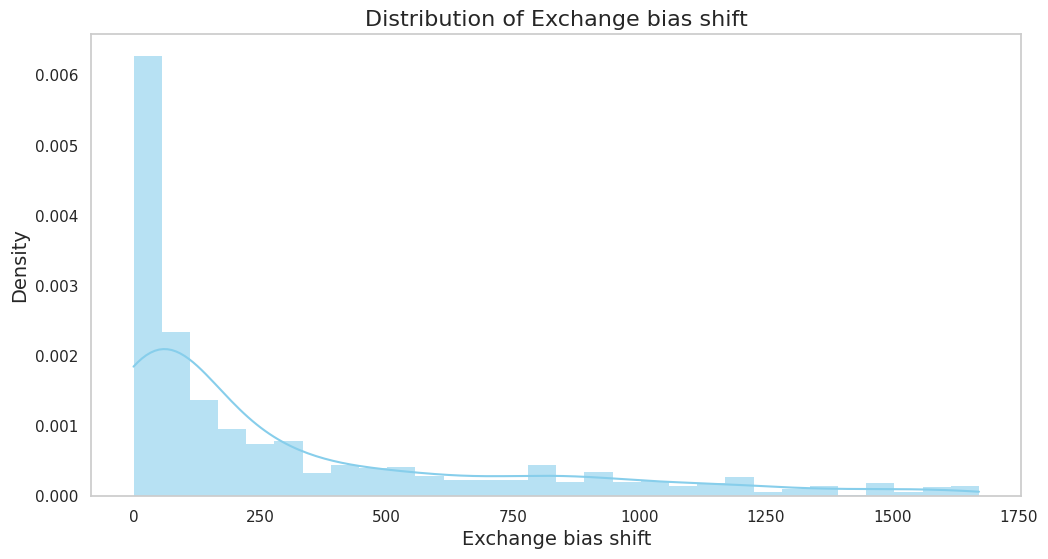

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# Plot the distribution using a histogram and KDE
sns.histplot(df['Exchange bias shift'], bins=30, kde=True, color='skyblue',
             stat='density', linewidth=0, alpha=0.6)

# Customize the title and labels
plt.title('Distribution of Exchange bias shift', fontsize=16)
plt.xlabel('Exchange bias shift', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a grid for better readability
plt.grid(False)

# Show the plot
plt.show()

Since it is evident that the exchange bias shift follows an exponential distribution, it will be necessary to transform the target variable using the decimal logarithm when training machine learning models.

In [3]:
df.columns

Index(['Area to volume ratio', 'Maximum field range', 'Curie temperature',
       'Experimental temperature', 'Saturation magnetization', 'Coercivity',
       'Remanent magnetization', 'Exchange bias shift',
       'Exchange shift direction', 'Vertical shift',
       'Vertical shift direction', 'Magnetic field strength', 'Sphericity',
       'Geometric anisotropy', 'Core b lattice parameter', 'Core alpha angle',
       'Core beta angle', 'Core gamma angle', 'Shell b lattice parameter',
       'Shell alpha angle', 'Shell beta angle', 'Shell gamma angle',
       'Magnetic ion ratio', 'Temperature difference',
       'Exchange stiffness coefficient', 'Core lattice ratio с to a',
       'Pauling electronegativity of core',
       'Pauling electronegativity of shell',
       'Valence electron concentration of core', 'Work function of core',
       'Valence electron concentration of shell', 'Work function of shell',
       'Pauling electronegativity difference of core',
       'Valence elect

# Voilin plots

In [15]:
# List of columns to be converted to categorical type
categorical_columns = ['Maximum field range', 'Exchange shift direction', 'Vertical shift direction', 'Sphericity']

# Convert the specified columns to categorical type
df[categorical_columns] = df[categorical_columns].astype('float64')

<ipython-input-11-772fafe18948>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 7, k)  # Increased the number of plots per row to 7


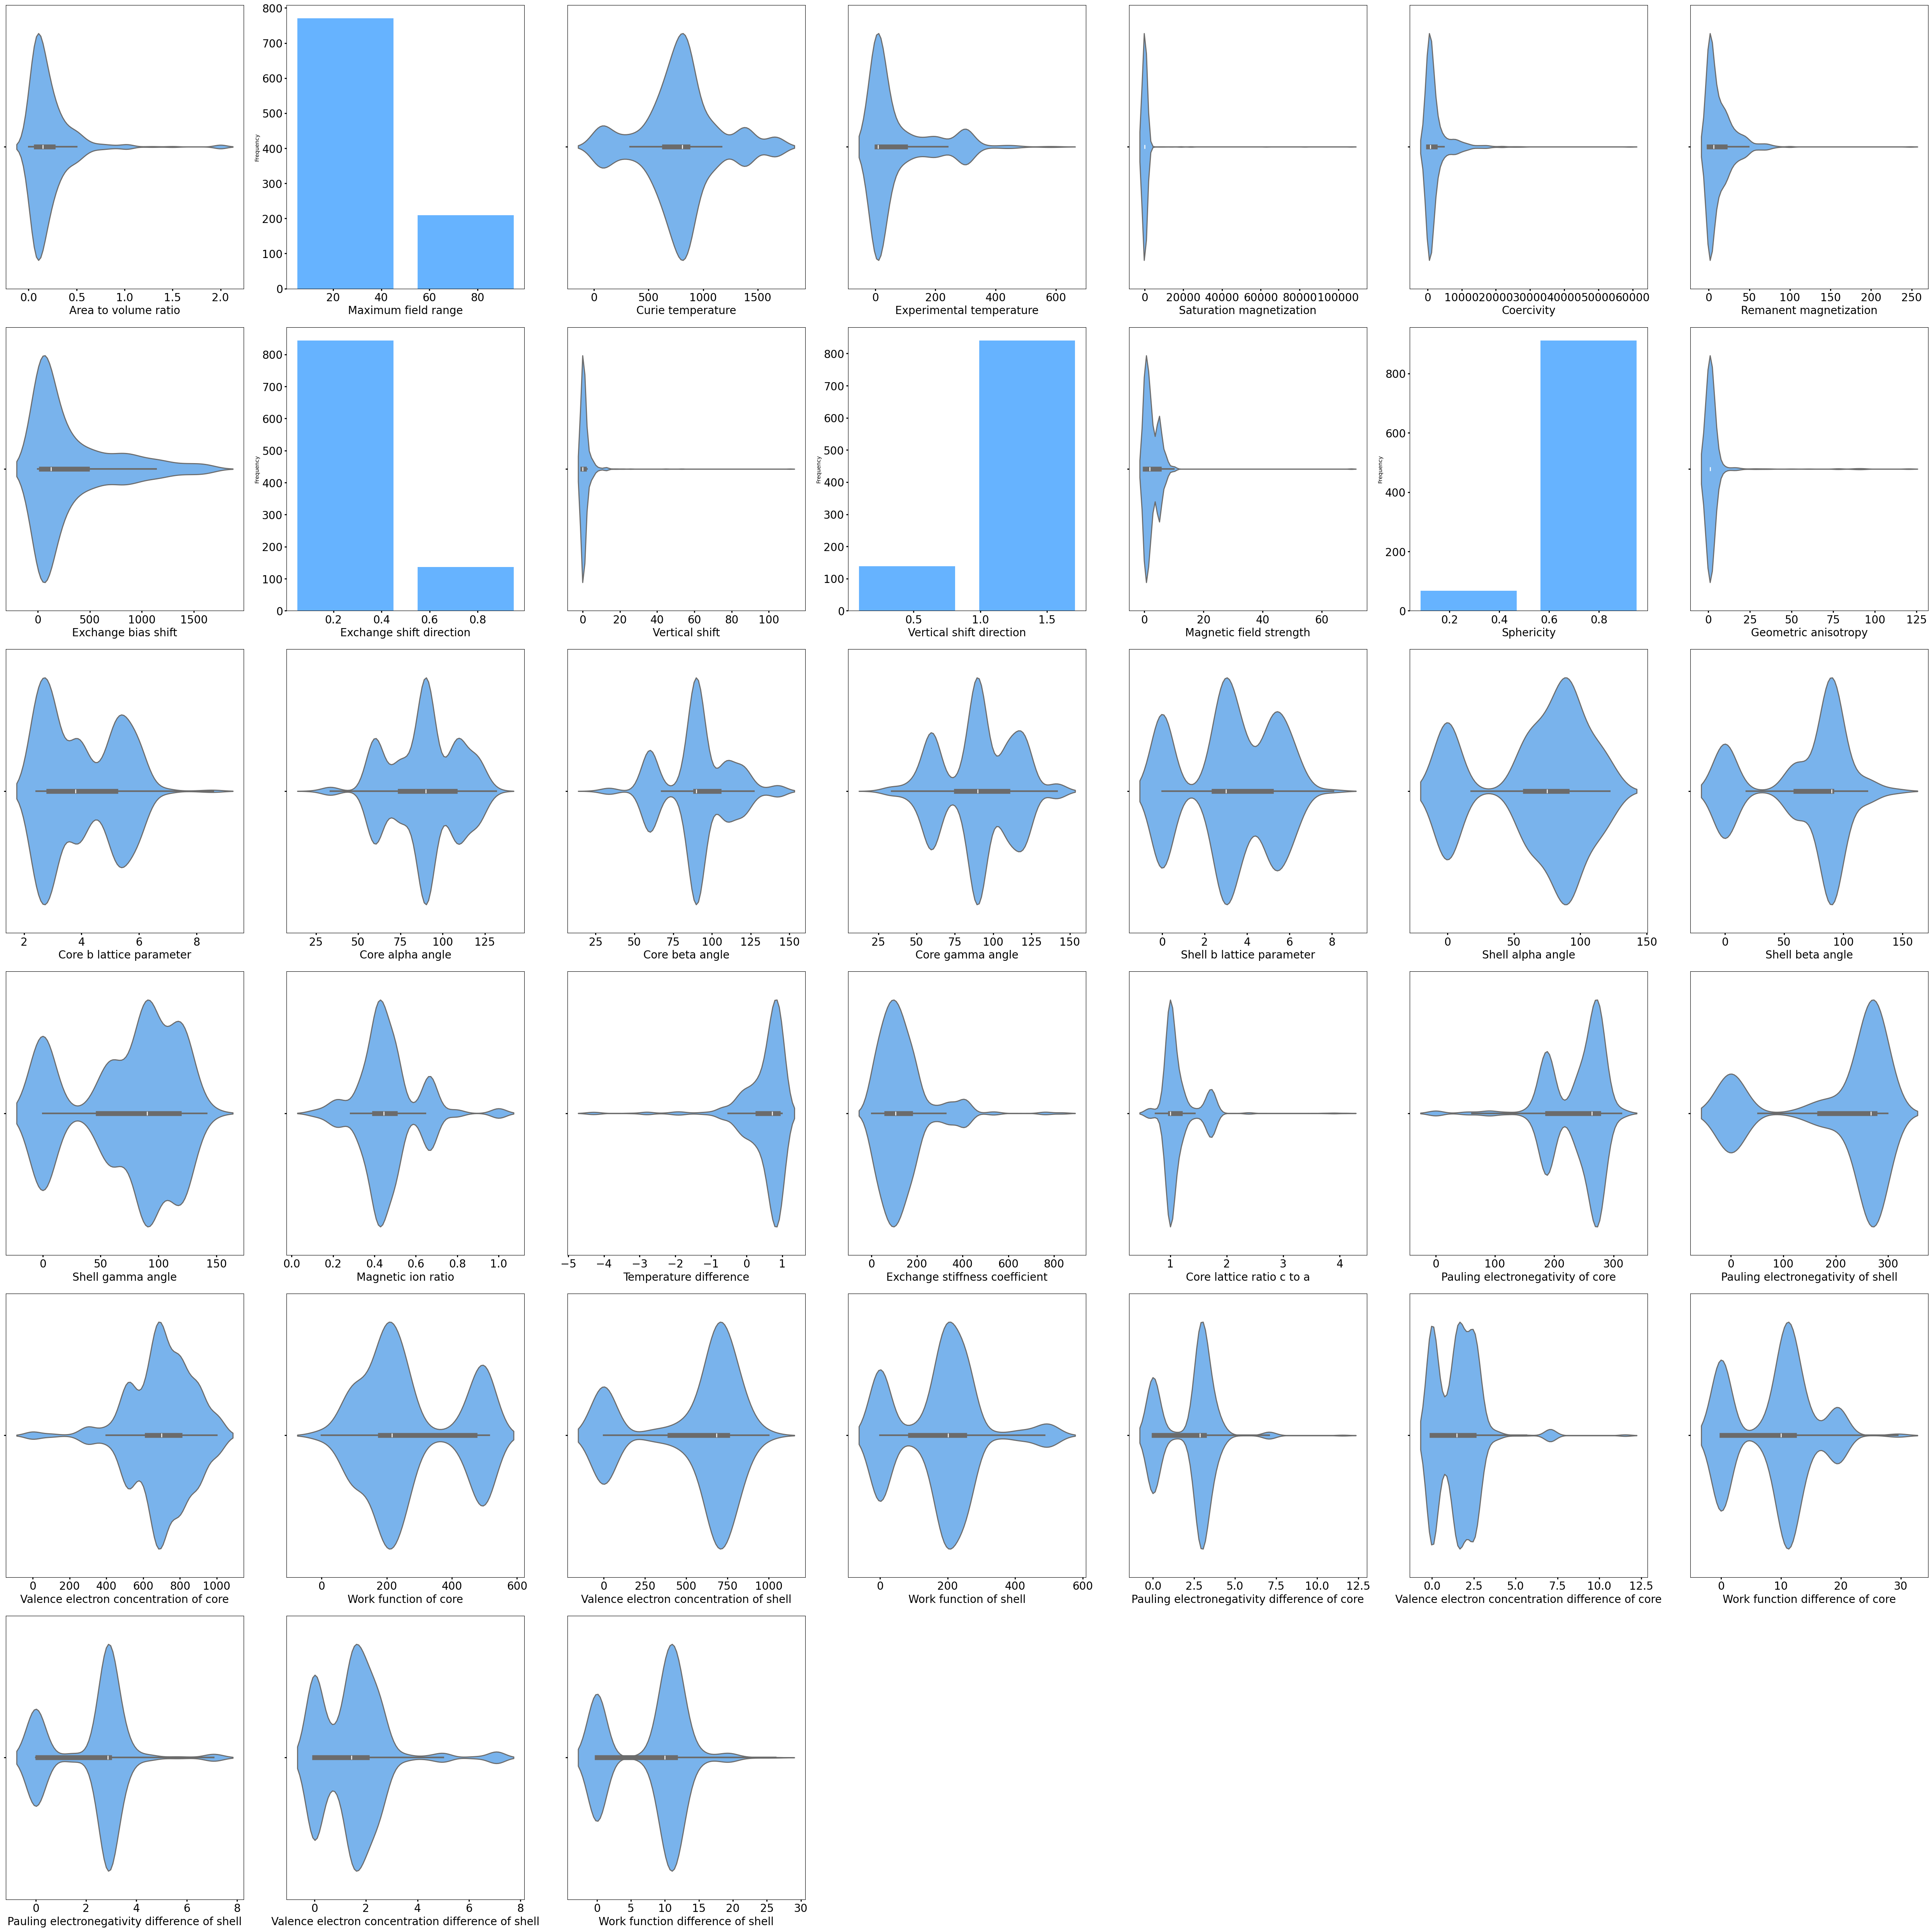

In [11]:
# Assuming that the DataFrame df and the list categorical_columns are already defined
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f']

k = 1
f, ax = plt.subplots(figsize=(50, 50))  # Reduced the height of the figure to 50 to avoid stretching the plots
num_columns = len(df.columns)
num_rows = (num_columns // 7) + 1  # Number of rows based on the number of plots

for i in df.columns:
    plt.subplot(num_rows, 7, k)  # Increased the number of plots per row to 7
    if i in categorical_columns:  # If it is a categorical parameter, draw a histogram
        df[i].plot.hist(bins=2, color='#66b3ff', rwidth=0.8)  # Reduced rwidth for compactness
        plt.xlabel(f'{i}', fontsize=20, family='sans-serif')  # Reduced font size
    else:  # Otherwise, draw a violin plot
        sns.violinplot(x=df[i], color='#66b3ff', linewidth=2)
        plt.xlabel(f'{i}', fontsize=20, family='sans-serif')  # Reduced font size
    plt.tick_params(axis='both', labelsize=20, width=2)  # Reduced label sizes
    k += 1

# Adjusting for a denser arrangement of plots with increased vertical spacing
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)  # Reduced padding for greater compactness
plt.show()

# Correlation Matrix

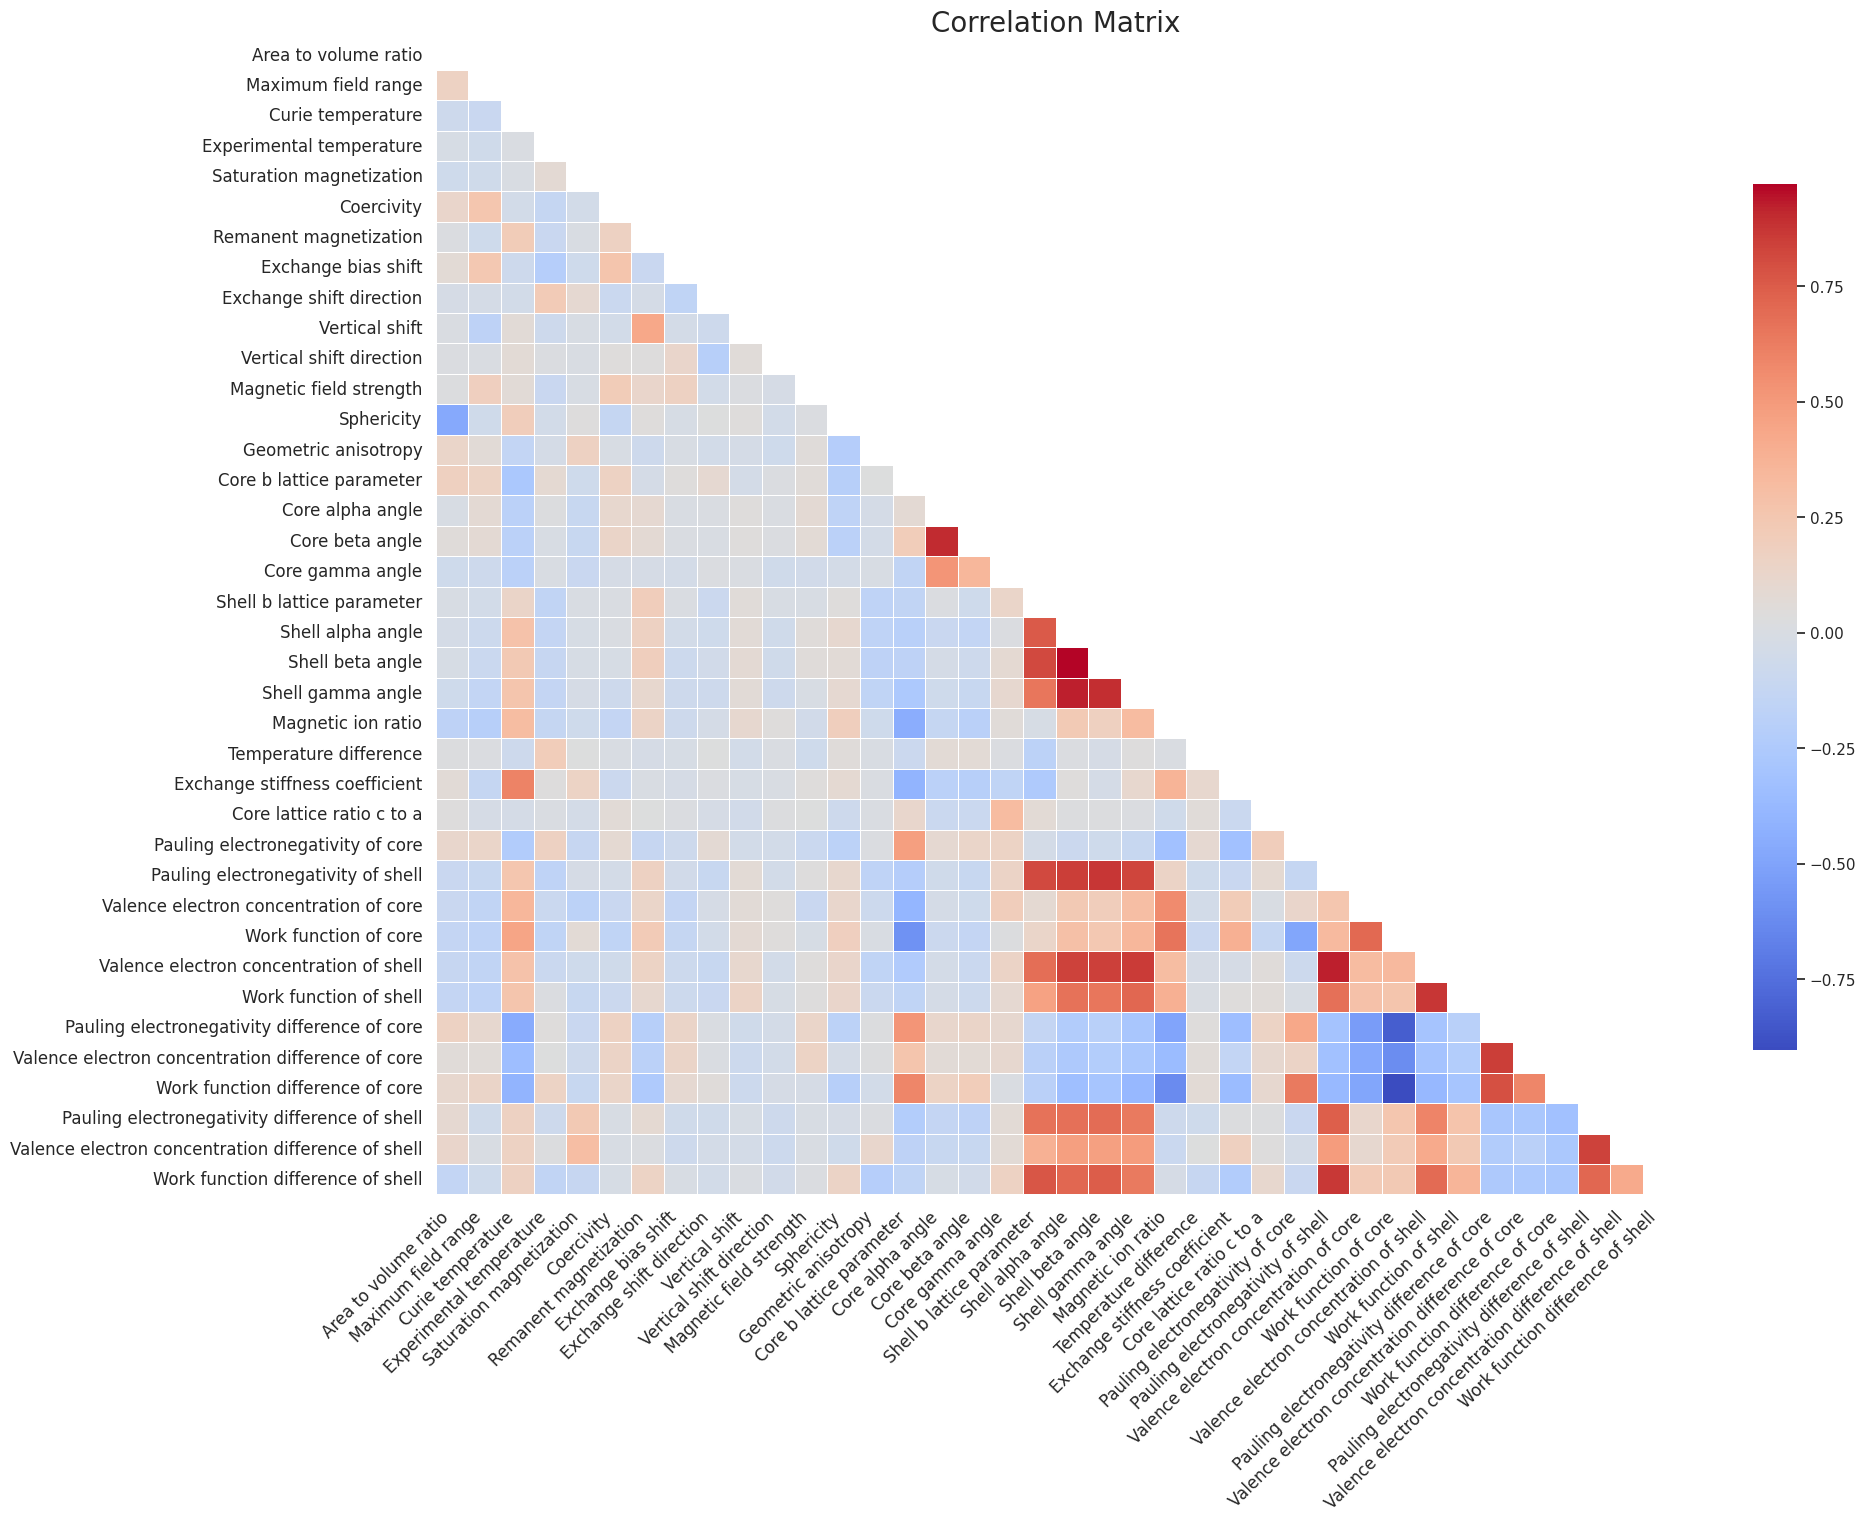

In [53]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Increase the figure size for better display
plt.figure(figsize=(20, 15))

# Plot the heatmap of the correlation matrix without annotations and grid lines
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap="coolwarm",
            linewidths=0.5, square=False, cbar_kws={"shrink": .75},
            linecolor=None)  # Ensure linecolor is None to remove any grid lines

# Set the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for better visibility
plt.yticks(rotation=0, fontsize=12)  # Keep y labels horizontal for consistency

# Set the title of the plot
plt.title('Correlation Matrix', fontsize=20)

# Add a grid for better readability
plt.grid(False)

# Show the plot
plt.show()